In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt

In [12]:
def draw_bounding_boxes(image, detections, threshold=0.25):

    for bbox, text, score in detections:

        if score > threshold:

            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)

            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 12, (255, 0, 0), 2)

In [15]:
image_path = "/Users/titouanlegourrierec/Desktop/results_text/codechampa7_P-3_M_93_(8).jpg.jpg"

img = cv2.imread(image_path)

if img is None:

    raise ValueError("Error loading the image. Please check the file path.")

In [3]:
reader = easyocr.Reader(['fr'], gpu=True)

In [26]:
text_detections = reader.readtext(img)

In [29]:
text_detections

[([[1600, 46], [2518, 46], [2518, 250], [1600, 250]],
  'code champ:',
  0.999731244336568),
 ([[2629, 33], [3083, 33], [3083, 265], [2629, 265]],
  '127',
  0.9749543070793152),
 ([[1627, 239], [1933, 239], [1933, 398], [1627, 398]],
  'P-3',
  0.971050251779083),
 ([[2188, 395], [2737, 395], [2737, 593], [2188, 593]],
  'M 93',
  0.9294950251297976)]

In [27]:
threshold = 0.25

draw_bounding_boxes(img, text_detections, threshold)

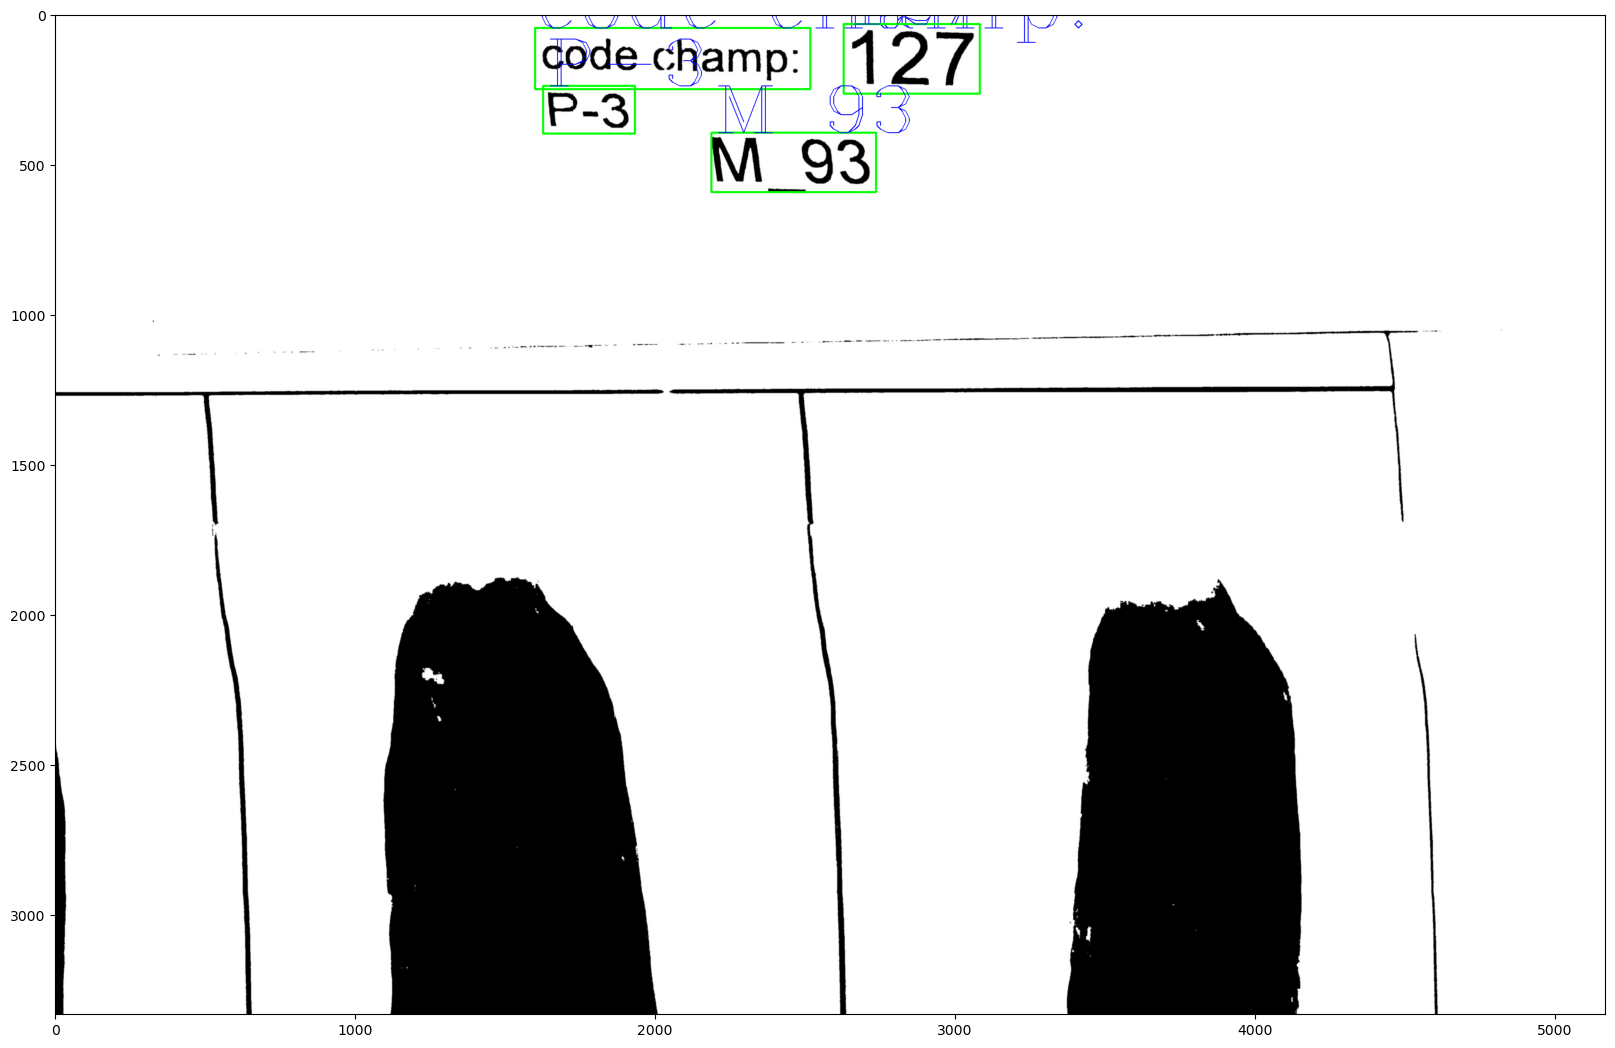

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

plt.show()

Corrupt JPEG data: 4405 extraneous bytes before marker 0xd0


T
R23
code champ:
24
P-2
M_133


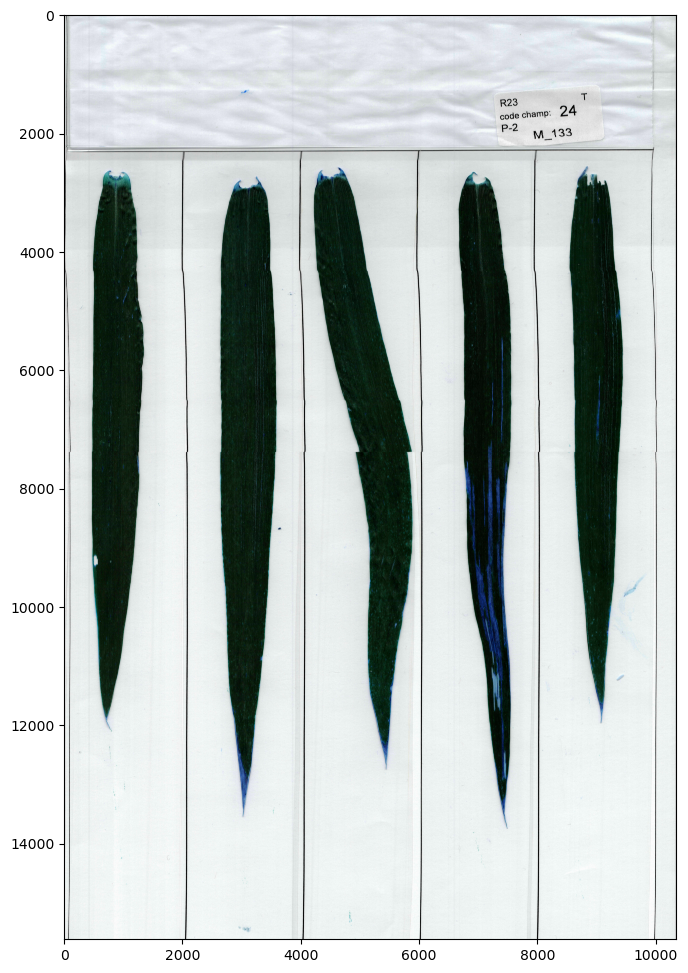

In [17]:
image_path = "/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/18.jpg"

img = cv2.imread(image_path)

if img is None:
    raise ValueError("Error loading the image. Please check the file path.")

text_detections = reader.readtext(img)

plt.figure(figsize=(12,12))
plt.imshow(img)

for elt in text_detections:
    print(elt[1])

In [7]:
import re

def reorganize_text(text):
    # Définition des motifs de regex pour identifier les éléments pertinents
    pattern_r23 = re.compile(r'R\d+')
    pattern_champ = re.compile(r'champ: \d+')
    pattern_p = re.compile(r'P-[^\s]+')
    pattern_m = re.compile(r'M_-\d+')
    pattern_code = re.compile(r'code \d+')

    # Recherche des correspondances dans le texte
    r23_match = pattern_r23.search(text)
    champ_match = pattern_champ.search(text)
    p_match = pattern_p.search(text)
    m_match = pattern_m.search(text)
    code_match = pattern_code.search(text)

    # Réorganisation des éléments trouvés dans le format souhaité
    organized_text = ""
    if r23_match:
        organized_text += r23_match.group() + "; "
    if champ_match:
        organized_text += "code champ : " + champ_match.group().split(': ')[-1] + "; "
    if p_match:
        organized_text += p_match.group() + "; "
    if m_match:
        organized_text += m_match.group() + "; "
    if code_match:
        organized_text += "code " + code_match.group().split(' ')[-1]

    return organized_text

# Exemple d'utilisation
text = "T R23 champ: P-1 M_-27 code 132"
organized_text = reorganize_text(text)
print(organized_text)

R23; P-1; M_-27; code 132
